In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=128,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150, 150),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=128,
                                                              directory=validation_dir,
                                                              target_size=(150, 150),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

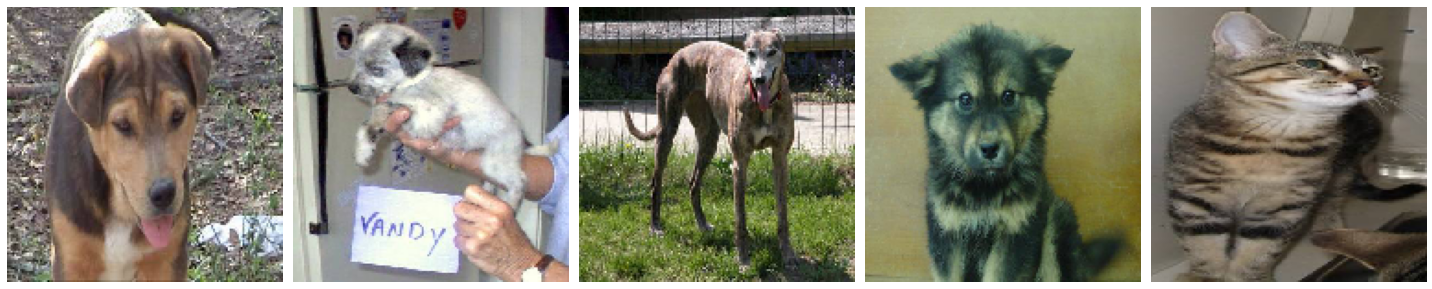

In [14]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // 128,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // 128
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 48s 3s/step - loss: 0.7855 - accuracy: 0.5005 - val_loss: 0.6889 - val_accuracy: 0.4933
Epoch 2/15
15/15 [==============================] - 48s 3s/step - loss: 0.6824 - accuracy: 0.5078 - val_loss: 0.6595 - val_accuracy: 0.5100
Epoch 3/15
15/15 [==============================] - 48s 3s/step - loss: 0.6449 - accuracy: 0.5935 - val_loss: 0.6244 - val_accuracy: 0.5725
Epoch 4/15
15/15 [==============================] - 47s 3s/step - loss: 0.5970 - accuracy: 0.6656 - val_loss: 0.5811 - val_accuracy: 0.6842
Epoch 5/15
15/15 [==============================] - 47s 3s/step - loss: 0.5568 - accuracy: 0.7078 - val_loss: 0.5502 - val_accuracy: 0.7054
Epoch 6/15
15/15 [==============================] - 47s 3s/step - loss: 0.4939 - accuracy: 0.7345 - val_loss: 0.5862 - val_accuracy: 0.7121
Epoch 7/15
15/15 [==============================] - 47s 3s/step - loss: 0.4855 - acc

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [20]:
train_data_gen = image_gen.flow_from_directory(batch_size=128,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(150, 150))

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

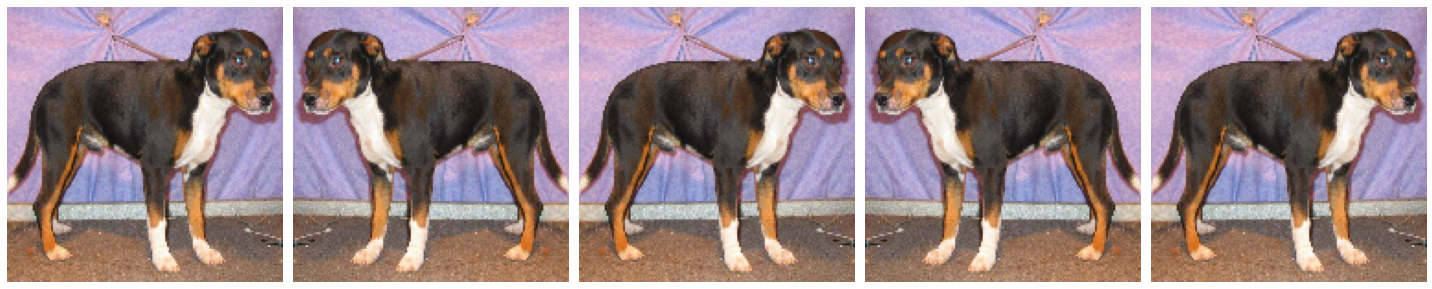

In [22]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [24]:
train_data_gen = image_gen.flow_from_directory(batch_size=128,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(150, 150))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


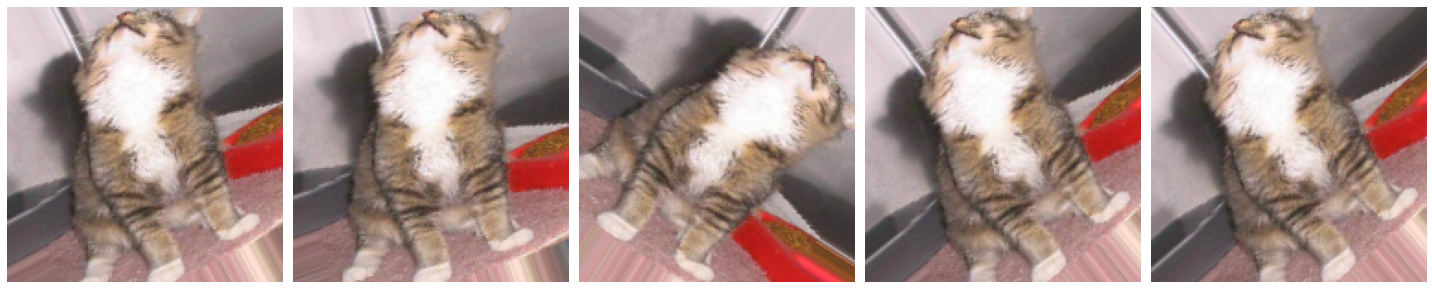

In [25]:
plotImages(augmented_images)

In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [27]:
train_data_gen = image_gen.flow_from_directory(batch_size=128,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(150, 150))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


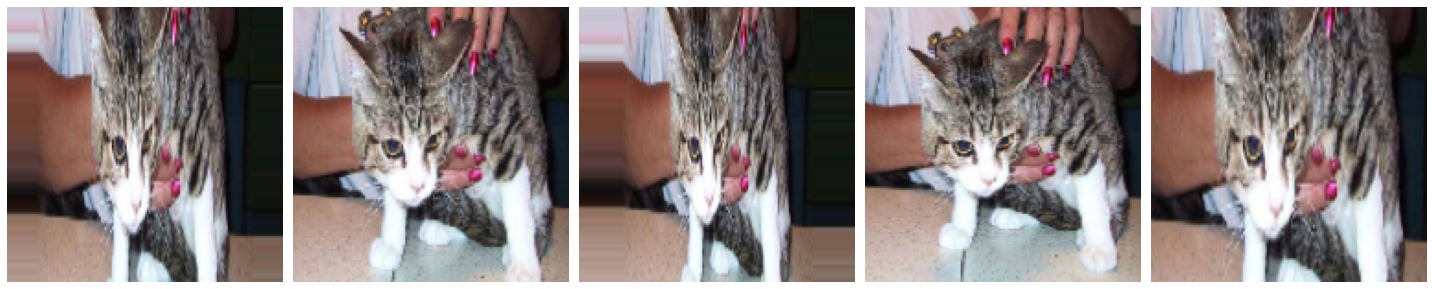

In [28]:
plotImages(augmented_images)

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [30]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=128,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(150, 150),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


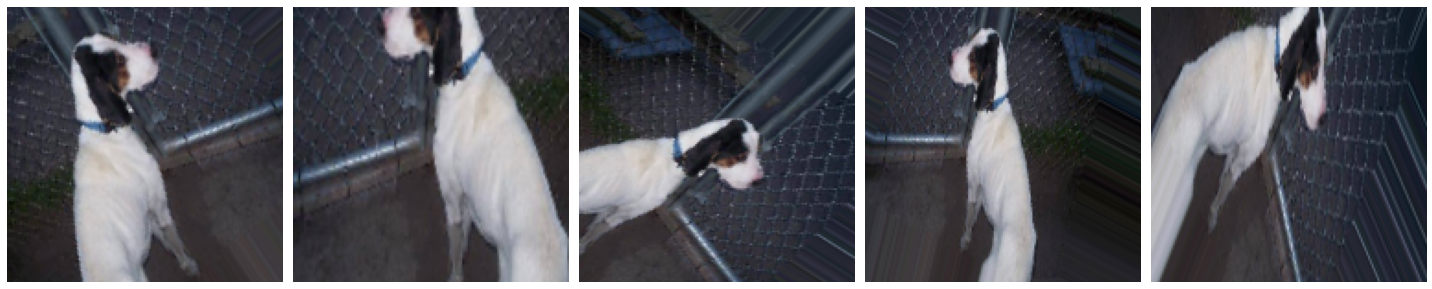

In [31]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [33]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=128,
                                                 directory=validation_dir,
                                                 target_size=(150, 150),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [35]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // 128,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // 128
)

Epoch 1/15
15/15 [==============================] - 58s 4s/step - loss: 1.0486 - accuracy: 0.4880 - val_loss: 0.6935 - val_accuracy: 0.5078
Epoch 2/15
15/15 [==============================] - 59s 4s/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6927 - val_accuracy: 0.5033
Epoch 3/15
14/15 [===========================>..] - ETA: 3s - loss: 0.6925 - accuracy: 0.5057

In [0]:
acc = history.history[]
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()